Best parameters: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

Evaluation on Test Data:
Mean Squared Error: 3479.644254558814
Mean Absolute Error: 46.49675422592929
R2 Score: 0.35541943734175174


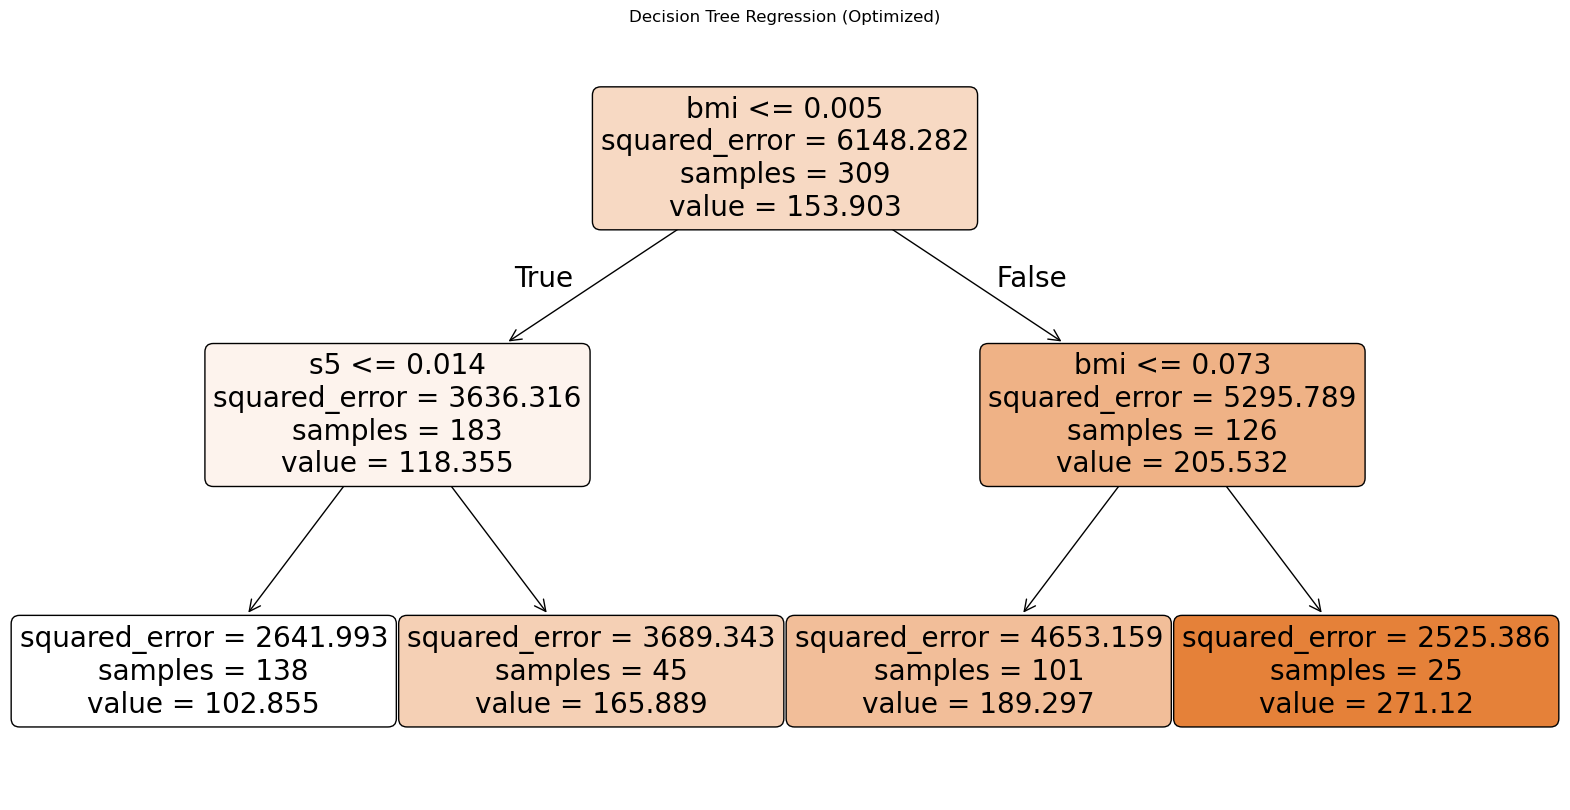

In [18]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

import warnings

warnings.filterwarnings("ignore")


# --------------------------Load a regression dataset ----------------------
data = load_diabetes()
X = data.data
y = data.target

#--------------------- Train-test split ------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --------------Define model -------------------
regressor = DecisionTreeRegressor(random_state=42)

# ---------------- Hyperparameter tuning with GridSearchCV ---------------
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# ------------- Best model and parameters ----------------
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# -------------- Predict and evaluate ---------------
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluation on Test Data:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)


plt.figure(figsize=(20, 10))
plot_tree(
    best_model,
    feature_names=data.feature_names,
    filled=True,
    rounded=True
)
plt.title("Decision Tree Regression (Optimized)")
plt.show()


In [ ]:
# ---------------------- Create DataFrame -----------
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# -----------Display the first 10 rows ---------------
print("🔹 Diabetes Dataset as a DataFrame:\n")
print(df.head(10))
df.head(10)

🔹 Diabetes Dataset as a DataFrame:

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
5 -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
6 -0.045472  0.050680 -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
7  0.063504  0.050680 -0.001895  0.066629  0.090620  0.108914  0.022869   
8  0.041708  0.050680  0.061696 -0.040099 -0.013953  0.006202 -0.028674   
9 -0.070900 -0.044642  0.039062 -0.033213 -0.012577 -0.034508 -0.024993   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592 

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0


          age       sex       bmi        bp        s1        s2        s3  \
age  1.000000  0.136522  0.181976  0.308406  0.261534  0.200301 -0.023100   
sex  0.136522  1.000000  0.044746  0.165128  0.033717  0.128023 -0.344052   
bmi  0.181976  0.044746  1.000000  0.384534  0.246802  0.255519 -0.372335   
bp   0.308406  0.165128  0.384534  1.000000  0.242052  0.164355 -0.113747   
s1   0.261534  0.033717  0.246802  0.242052  1.000000  0.891476  0.044128   
s2   0.200301  0.128023  0.255519  0.164355  0.891476  1.000000 -0.190767   
s3  -0.023100 -0.344052 -0.372335 -0.113747  0.044128 -0.190767  1.000000   
s4   0.165340  0.320619  0.431946  0.209316  0.556987  0.653120 -0.732862   
s5   0.270981  0.121299  0.448657  0.362476  0.528922  0.307541 -0.388778   
s6   0.262201  0.159936  0.394699  0.376421  0.323666  0.298647 -0.304091   

           s4        s5        s6  
age  0.165340  0.270981  0.262201  
sex  0.320619  0.121299  0.159936  
bmi  0.431946  0.448657  0.394699  
bp   0.2

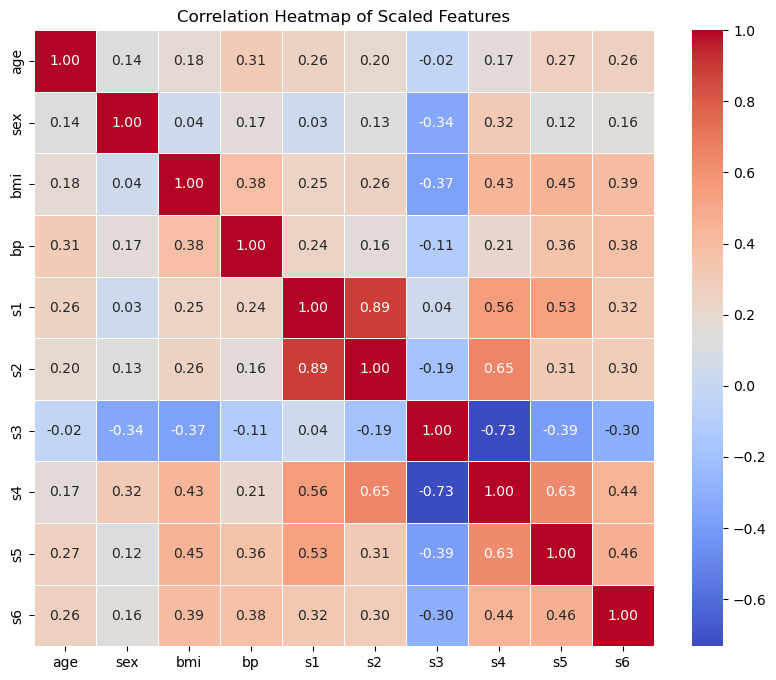

In [12]:


# ---------------Apply standard scaling to X_train ------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

#----------- Convert X_train to DataFrame for correlation matrix-------------------------
X_train_df = pd.DataFrame(X_train_scaled, columns=data.feature_names)


print(X_train_df.corr())

#------- Plot the heatmap ----------------
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, linewidths=0.5)
plt.title("Correlation Heatmap of Scaled Features")
plt.show()

In [19]:
#---------------------- Apply standard scaling to X_train and X_test ------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#  -----------------Perform feature selection (select top k features based on univariate statistical tests) -----------
selector = SelectKBest(f_regression, k=5)  # Selecting top 5 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

#  -------------Get the names of the selected features -----------------
selected_features = np.array(data.feature_names)[selector.get_support()]
print(f"Selected features: {selected_features}")

# ---------- Hyperparameter grid for DecisionTreeRegressor ------------------
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# ------------ Instantiate the DecisionTreeRegressor ----------------
dt_regressor = DecisionTreeRegressor(random_state=42)

# --------------- Use GridSearchCV to find the best hyperparameters ----------------------------
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_selected, y_train)

# --------------------- Get the best parameters from the grid search -----------------------
print(f"Best hyperparameters: {grid_search.best_params_}")

Selected features: ['bmi' 'bp' 's3' 's4' 's5']
Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=5; 

In [23]:
# ------------------Train the model using the best hyperparameters from GridSearchCV ------------------
best_dt_regressor = grid_search.best_estimator_
best_dt_regressor.fit(X_train_selected, y_train)

# ------------------------ Predict on the test set ------------------------
y_pred = best_dt_regressor.predict(X_test_selected)


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on the test set: {mse}")

Mean Squared Error on the test set: 3246.2225697657304


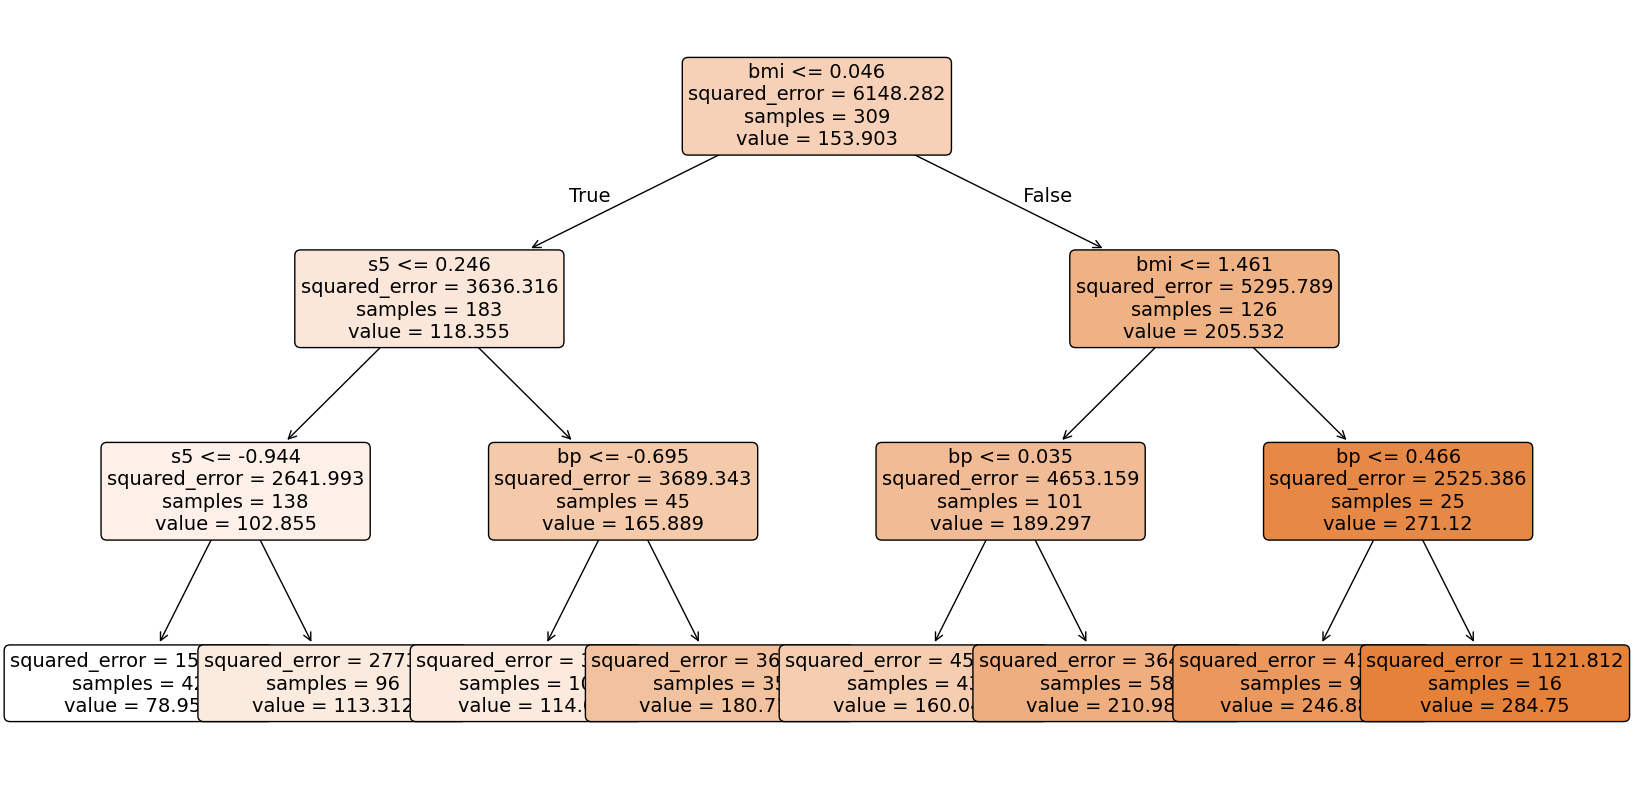

In [24]:
plt.figure(figsize=(20,10))
plot_tree(best_dt_regressor, filled=True, feature_names=selected_features, 
          class_names=[str(i) for i in range(10)], rounded=True, fontsize=14)
plt.show()